In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
import shutil
import sys
import os

In [25]:
train_df = pd.read_csv('C:/Users/coco/kaggle/aptos2019-blindness-detection/train.csv')
test_df = pd.read_csv('C:/Users/coco/kaggle/aptos2019-blindness-detection/test.csv')
print(train_df.shape)
print(test_df.shape)
train_df.head()

(3662, 2)
(1928, 1)


,id_code,diagnosis
0,000c1434d8d7,2
1,001639a390f0,4
2,0024cdab0c1e,1
3,002c21358ce6,0
4,005b95c28852,0


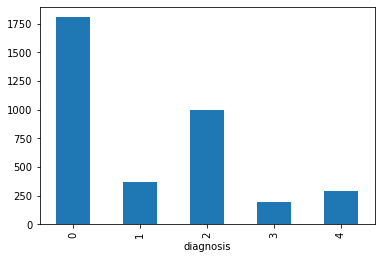

In [3]:
train_df.groupby("diagnosis").size().plot(kind = "bar")

In [4]:
list_0=[]
for a in train_df[train_df['diagnosis']==0]['id_code']:
    list_0.append(a)
list_1=[]
for b in train_df[train_df['diagnosis']==1]['id_code']:
    list_1.append(b)
list_2=[]
for c in train_df[train_df['diagnosis']==2]['id_code']:
    list_2.append(c)
list_3=[]
for d in train_df[train_df['diagnosis']==3]['id_code']:
    list_3.append(d)
list_4=[]
for e in train_df[train_df['diagnosis']==4]['id_code']:
    list_4.append(e)

In [43]:
train_dir = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_images/"
#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
if not os.path.exists("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "4"):
        os.mkdir("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "4")
for i in list_4:
    src_path = train_dir + i + ".png"
    dst_path = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "4" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [44]:
train_dir = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_images/"
#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
if not os.path.exists("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "3"):
        os.mkdir("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "3")
for i in list_3:
    src_path = train_dir + i + ".png"
    dst_path = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "3" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [45]:
train_dir = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_images/"
#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
if not os.path.exists("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "2"):
        os.mkdir("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "2")
for i in list_2:
    src_path = train_dir + i + ".png"
    dst_path = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "2" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [46]:
train_dir = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_images/"
#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
if not os.path.exists("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "1"):
        os.mkdir("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "1")
for i in list_1:
    src_path = train_dir + i + ".png"
    dst_path = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "1" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [47]:
train_dir = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_images/"
#train_sep_dir = '..input/train_sep/'
    # Create subdirectory with `class_name`
if not os.path.exists("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "0"):
        os.mkdir("C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "0")
for i in list_0:
    src_path = train_dir + i + ".png"
    dst_path = "C:/Users/coco/kaggle/aptos2019-blindness-detection/train_split" + "0" + "/" + i + ".png"
    shutil.copy(src_path, dst_path)

In [48]:
import splitfolders
input='C:/Users/coco/kaggle/aptos2019-blindness-detection'
output='C:/Users/coco/kaggle/final_dataset'
splitfolders.ratio(input, output=output, seed=1337, ratio=(.8, .1, .1))

Copying files: 9252 files [02:56, 52.52 files/s] 


In [4]:
import numpy as np 
import pandas as pd 
import shutil
import sys
import os

In [5]:
import os
os.getcwd()
os.chdir('C:/Users/coco/kaggle/final_dataset')

In [6]:
from keras.callbacks import Callback, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import Model
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout
from keras.preprocessing import image
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam
import keras.backend as K

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.model_selection import train_test_split
from sklearn.metrics import cohen_kappa_score, accuracy_score
import scipy

%matplotlib inline

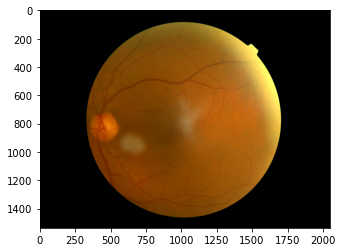

In [26]:
PATH = "C:/Users/coco/kaggle/final_dataset/test/train_split0/4ffa38550c95.png"
for i in range(0,1):
    p = PATH.format(i)
    image = mpimg.imread(p) # images are color images
    plt.imshow(image)

In [8]:
train_datagen= ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.1, horizontal_flip= True)
valid_datagen= ImageDataGenerator(rescale=1./255)
size=(128,128)          #reshape the image in  (128,128)
in_shape=(128,128,3)   #input shape of image is  (128,128,3)
train_set= train_datagen.flow_from_directory('train', 
                                             target_size=size, batch_size=50, class_mode='categorical', 
                                             shuffle=True, seed=20)
valid_set= valid_datagen.flow_from_directory('val', 
                                             target_size=size, batch_size=50, class_mode='categorical', 
                                             shuffle=False)

Found 2929 images belonging to 5 classes.
Found 364 images belonging to 5 classes.


In [9]:
#using pre-trained model VGG16
base_model=VGG16(input_shape=in_shape, weights='imagenet', include_top=False)

In [10]:
x=base_model.output
x=Conv2D(32, (3,3), activation='relu')(x)
x=MaxPooling2D(pool_size=(2,2))(x)
x=Flatten()(x)
x=Dense(units=128, activation='relu')(x)
x=Dense(units=64, activation='relu')(x)
x=Dense(units=32, activation='relu')(x)
x=Dense(units=5, activation='softmax')(x)

In [11]:
model=Model(inputs=base_model.inputs, outputs=x)
for layer in model.layers[:16]:
  layer.trainable=False

for layer in model.layers[16:]:
    layer.trainable=True

In [15]:
#Compile and fit the datasets
model.compile(optimizer=Adam(lr=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
step_size_train=train_set.n//train_set.batch_size
step_size_valid=valid_set.n//valid_set.batch_size
model.fit_generator(train_set, steps_per_epoch=step_size_train, epochs=10, 
                    validation_data= valid_set, validation_steps=step_size_valid)
#Save model
model.save('save_vgg16_model.h5')

C:\Users\coco\anaconda3\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
<ipython-input-15-42d717f5b8c9>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(train_set, steps_per_epoch=step_size_train, epochs=10,


Epoch 1/10
58/58 [==============================] - 525s 9s/step - loss: 0.9816 - accuracy: 0.6507 - val_loss: 0.8241 - val_accuracy: 0.7029
Epoch 2/10
58/58 [==============================] - 463s 8s/step - loss: 0.8317 - accuracy: 0.7072 - val_loss: 0.8602 - val_accuracy: 0.6971
Epoch 3/10
58/58 [==============================] - 472s 8s/step - loss: 0.8145 - accuracy: 0.7072 - val_loss: 0.7682 - val_accuracy: 0.7286
Epoch 4/10
58/58 [==============================] - 453s 8s/step - loss: 0.7867 - accuracy: 0.7148 - val_loss: 0.7525 - val_accuracy: 0.7257
Epoch 5/10
58/58 [==============================] - 465s 8s/step - loss: 0.7629 - accuracy: 0.7256 - val_loss: 0.7190 - val_accuracy: 0.7229
Epoch 6/10
58/58 [==============================] - 454s 8s/step - loss: 0.7478 - accuracy: 0.7301 - val_loss: 0.6989 - val_accuracy: 0.7314
Epoch 7/10
58/58 [==============================] - 451s 8s/step - loss: 0.7160 - accuracy: 0.7339 - val_loss: 0.6952 - val_accuracy: 0.7457
Epoch 8/10
58

In [12]:
from keras.models import load_model
model=load_model('save_vgg16_model.h5')

In [13]:
import os
label=os.listdir('C:/Users/coco/kaggle/final_dataset/test')
pred1=np.array([])
conf=np.array([])
true=np.array([])

In [14]:
y=pd.read_csv('C:/Users/coco/kaggle/aptos2019-blindness-detection/test.csv')

In [27]:
y.head()

,id_code
0,0005cfc8afb6
1,003f0afdcd15
2,006efc72b638
3,00836aaacf06
4,009245722fa4


In [16]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
for i in y['id_code']:
    img1=load_img(("C:/Users/coco/kaggle/aptos2019-blindness-detection/test_images/"+i+".png"),target_size=size)
    #print(type(img1))
    img=img_to_array(img1)
    imgf=img.reshape(1,128,128,3)
    output=model.predict(imgf)
    pred1=np.append(pred1,(np.argmax(output[0])))

In [17]:
pred = []
for j in pred1:
    pred.append(int(j))
print(pred)

[2, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 3, 0, 2, 2, 0, 2, 2, 0, 0, 2, 2, 3, 2, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 3, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 2, 3, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 2, 0, 0, 

In [18]:
x = pd.DataFrame({'id_code':y['id_code'],'diagnosis': pred })

In [28]:
x.tail(100)

,id_code,diagnosis
1828,f3e5159e0b2d,2
1829,f3f696c65bfd,0
1830,f41ef796cc0d,2
1831,f443c3d7ab22,0
1832,f444cd113883,2
...,...,...
1923,ff2fd94448de,0
1924,ff4c945d9b17,2
1925,ff64897ac0d8,2
1926,ffa73465b705,2
